Epoch 1/5
188/188 [==============================] - 1s 3ms/step - loss: 2.4466 - accuracy: 0.1657 - val_loss: 1.9472 - val_accuracy: 0.2590
Epoch 2/5
188/188 [==============================] - 0s 2ms/step - loss: 1.9532 - accuracy: 0.2695 - val_loss: 1.7603 - val_accuracy: 0.3660
Epoch 3/5
188/188 [==============================] - 0s 2ms/step - loss: 1.8270 - accuracy: 0.3103 - val_loss: 2.0595 - val_accuracy: 0.2670
Epoch 4/5
188/188 [==============================] - 0s 2ms/step - loss: 1.8758 - accuracy: 0.3026 - val_loss: 1.8914 - val_accuracy: 0.2940
Epoch 5/5
188/188 [==============================] - 0s 2ms/step - loss: 1.8993 - accuracy: 0.2935 - val_loss: 2.3185 - val_accuracy: 0.1690


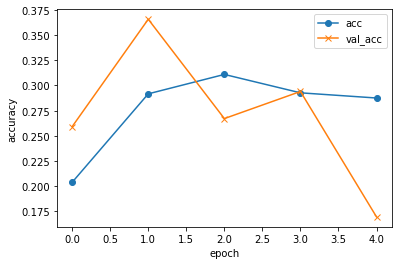

In [4]:
#드롭아웃을 구현하여 훈련 데이터와 테스트 데이터의 정확도가 가까워짐을 확인하기

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import optimizers
from keras.utils.np_utils import to_categorical

(X_test, y_test), (X_train, y_train) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))

model.add(Dropout(rate=0.5))

model.add(Dense(10))
model.add(Activation("softmax"))

sgd = optimizers.SGD(lr=1.0)

model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=32, epochs=5, verbose=1, validation_data=(X_test, y_test))

#acc와 val_acc 플롯
plt.plot(history.history["accuracy"], label="acc", ls="-", marker="o")
plt.plot(history.history["val_accuracy"], label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()